In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[gaps_df.type=='N']

In [74]:
sizes_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38_chromsome_sizes.txt', header=None)
sizes = [int(s.replace(',','')) for s in sizes_df[2]]
starts = [np.sum(sizes[:i]) for i in range(23)] + [3041559849]

def loci_linear_idx(chrom, loci):
    chrom=int(chrom)
    if chrom==24: chrom=23
    return starts[chrom-1]+loci

In [105]:
stop

122224635.0

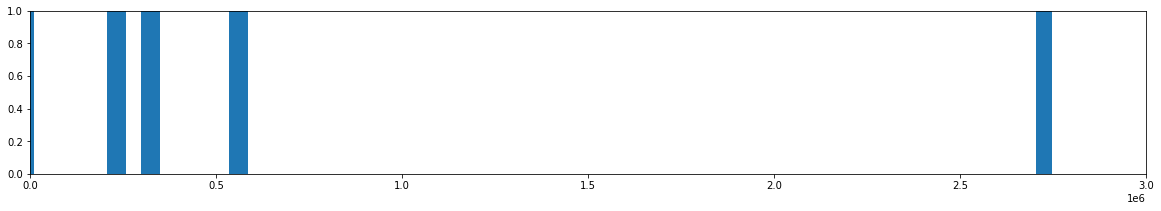

In [120]:
from matplotlib.patches import Rectangle
linear_idxs = [(loci_linear_idx(chrom.replace('chr', '').replace('X', '23').replace('Y', '24'), start), 
                loci_linear_idx(chrom.replace('chr', '').replace('X', '23').replace('Y', '24'), stop)) for chrom, start, stop in zip(gaps_df.chrom, gaps_df.start, gaps_df.stop) if len(chrom)<5 ]
plt.figure(figsize=(20,3))
ax = plt.gca()
for start, stop in linear_idxs[:10]:
    r = Rectangle(xy=(start, 0), height=10, width=stop-start)
    ax.add_patch(r)
plt.xlim(0,3e6)
plt.show()

In [30]:
kmer_seqs = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/intermediate_files/family_likelihoods/kmers_unmapped_prev_and_median_filt.txt', skiprows=100000, nrows=18000, header=None)

In [46]:
kmer_seqs

,0
0,AATGTATATTATGTACTGTACATAATATATTAAATCGCCCAAATAC...
1,AGGGAATGGAGTGGAGTGGAATGAAGTGGAGTGCAGTGGAGTTCAA...
2,TAGATTCATATATGTATACATGAATATTTTTATAGATTCATATATG...
3,ATACGATTATATAATTCTACATATTATAAATGAAAATATGTAGAAT...
4,CTTGCCATTCCATTCCATCACATTCCATTCCACTCGACTCCAACCC...
...,...
17995,ATTATAATATTACGTATGTTAGTTATATTGGGTGATATGTAATATA...
17996,AATGCAATGGAATGCAATCATCCGGAATGGAATGGAATGGTATGGA...
17997,AACACGAGTTGAATGGAATGGAATGGAATAGAATCAACCCCAGTGG...
17998,GTGCAGGGGAATGGAATGGAATGGAATGGAATAGATTGGAATGGAA...


In [9]:
test_df = pd.DataFrame(full_df[:,:18000])
test_df

,0,1,2,3,4
0,14.0,0.281,13.0,18420549.0,18586722.0
1,3.0,0.271,15.0,20127241.0,22830717.0
2,4.0,0.695,NaN,NaN,NaN
3,9.0,0.417,23.0,22783263.0,119617769.0
4,3.0,0.501,NaN,NaN,NaN
...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN


In [59]:
kmer_seqs.iloc[test_df[test_df[2]==4.0].sort_values(3).index[:100]].values#.loc[8315].values

array([['ACTCAATTCCTTTTCACTCCATTCCAATCCACTCCACTCCATTCCACTTCCCTCCATTCCATTCCACTCCTTTTTATCCACTCCACTCCATTCCCCTCCA'],
       ['CAAGGGCTCAGACAGGCCAGCGGGCTCCCGTGCACGTCAGCCGGGGTGAACAATGAGCGCAGGTCTAGCCAGGAGGCCTTTAATGAGAGCTAGAGGTCTC'],
       ['ATGGAATGCAGTGGAGTGGAGTGGAATGGAATGGAATCGAGTGGAGAGGAGTGGAATGGAATGGAAAGGAATGGAGAGGAGTGGTGTCGATTGTGGTGAA'],
       ['AAATGGATTGGAATTGAATCAGCCCCACCGGAATGGAATTGAATGGAATGGATTGAAATTGAATGGAATGGAAGAGAATGGAATGGAATGGAATGGAATG'],
       ['CATTCCATTCCCCTGCACTCGGGTTGATTCCATTCCATTCCATTACATTCCGTTCCATTCCATTCCATTCCATTCGGATTGATTCTATTCAATTCCCTTA'],
       ['ATGGAATCTACCCGTATGGAATTTAATGGAATGGAATGGAATGGAACAGAATCTACCCGAATGGAATGGAAAGGATTGGAATCGAATGCAGTGCAATGGA'],
       ['AGTGTTGTGGAGTTGAGTGGAATGGTGTGCAGTGAAATGGAATGGATTTCAATGGAATGGAGTGGAATGCAATTGAGTGTTAGTGGTCTGGTGTGGATCG'],
       ['AAGTCCATTACATTTGAGTCCATTCCCTTCCCTTCCATTCCATTCCATTCCATGTGATTCCATTCCATTCCCGTCCATTCCATTCGAATCAGTAAATTTC'],
       ['ACCCTATGGCCTGAGCTGGCGGCGTGGCCACAGAAGGCTGTGGCTGTCCTGGACTGCACGTGCACCACCAGGCGTAGGGCCCAGCCT

In [132]:
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[gaps_df.type=='N']
gaps_df

,chrom,start,stop,idx,type,ncbi_idx,location,7,8
10175,chr14,1,10000,1,N,10000,telomere,no,na
10176,chr14,10001,16000000,2,N,15990000,short_arm,no,na
10178,chr14,16022538,16022637,4,N,100,contig,no,na
10180,chr14,16053977,16054459,6,N,483,scaffold,yes,paired-ends
10182,chr14,16061678,16061993,8,N,316,scaffold,yes,paired-ends
10184,chr14,16086626,16089562,10,N,2937,scaffold,yes,paired-ends
10186,chr14,16096531,16096630,12,N,100,contig,no,na
10188,chr14,16105377,16113232,14,N,7856,scaffold,yes,paired-ends
10190,chr14,16130859,16133335,16,N,2477,scaffold,yes,paired-ends
10192,chr14,16140528,16140627,18,N,100,contig,no,na


In [1]:
chrom=14
f, ax = plt.subplots(figsize=(20,3))
nbins = plt.hist(test_df[test_df[2]==chrom][3], bins=1000, color='blue')
gaps_df = pd.read_table('/home/groups/dpwall/briannac/general_data/reference_genomes/hg38/hg38_agp_file.tsv', header=None)
gaps_df.columns = ['chrom', 'start', 'stop', 'idx', 'type', 'ncbi_idx', 'location', 7, 8]
gaps_df = gaps_df[gaps_df.type=='N']
gaps_df = gaps_df[gaps_df.chrom==('chr'+str(chrom))]
#plt.hist(gaps_df.start, bins=1000)
for start, stop in zip(gaps_df.start, gaps_df.stop):
    r = Rectangle(xy=(start, 0), height=max(2*nbins[1]), width=stop-start, color='grey', alpha=.3)
    ax.add_patch(r)
nbins = plt.hist(test_df[test_df[2]==chrom][3], bins=1000, color='blue')

#plt.xlim(0,stop)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
nbins = plt.hist(test_df[test_df[2]==chrom][3], bins=10000, color='blue')


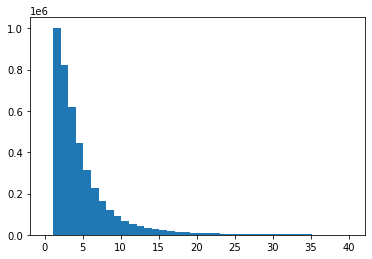

In [8]:
plt.hist(kmer_counts.values.flatten(), bins=.1+np.linspace(0,40,41))
plt.show()

(array([614., 581., 486., 363., 211., 173., 104.,  71.,  41.,  29.,  16.,
          8.,  12.,   8.,   5.,   0.,   2.,   0.,   1.]),
 array([ 1.1,  2.1,  3.1,  4.1,  5.1,  6.1,  7.1,  8.1,  9.1, 10.1, 11.1,
        12.1, 13.1, 14.1, 15.1, 16.1, 17.1, 18.1, 19.1, 20.1]),
 <BarContainer object of 19 artists>)

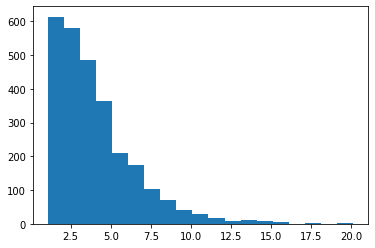

In [134]:
plt.hist(kmer_counts.iloc[622], bins=.1+np.linspace(1,20, 20))

In [107]:
np.linspace(0,20, 21)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [83]:
filtered_df = pd.DataFrame()
for N in range(1,20):
    df = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/kmers_unmapped_counts_filt.tsv', skiprows=N*10000, nrows=10000, index_col=0, header=None)
    good_df = df[(df.apply(lambda x: np.mean(x>0), axis=1)>.2) & (df.apply(lambda x: np.mean(x>0), axis=1)<.8)]
    filtered_df = pd.concat([filtered_df, good_df])
    print(len(filtered_df))
plt.hist(filtered_df.apply(lambda x: np.median(x[x>0]), axis=1), bins=np.linspace(0,30))
plt.show()

280
539
759
995
1259
1519


KeyboardInterrupt: 

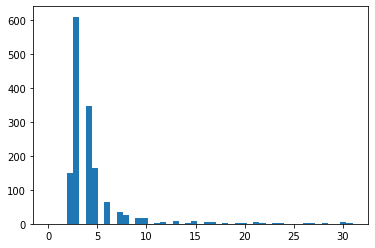

In [89]:
plt.hist(filtered_df.apply(lambda x: np.median(x[x>0]), axis=1), bins=np.linspace(0,31))
plt.show()

(array([  0.,   0.,  85.,   0.,   0., 112.,   0., 125.,   0.,   0., 119.,
          0., 127.,   0.,   0., 131.,   0.,   0., 117.,   0., 112.,   0.,
          0.,  77.,   0.,  61.,   0.,   0.,  54.,   0.,  35.,   0.,   0.,
         36.,   0.,   0.,  21.,   0.,  29.,   0.,   0.,  27.,   0.,  18.,
          0.,   0.,  13.,   0.,   9.]),
 array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
         2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
         4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
         6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
         8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
        10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
        12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
        14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
        16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       

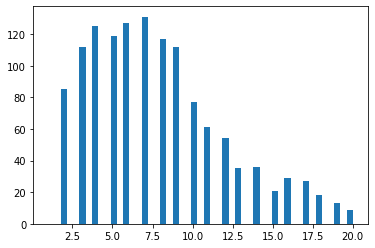

In [97]:
plt.hist(filtered_df.loc[filtered_df.apply(lambda x: np.median(x[x>0]), axis=1).index[0]], bins=np.linspace(1,20))

In [92]:
filtered_df

,1,2,3,4,5,6,7,8,9,10,...,4559,4560,4561,4562,4563,4564,4565,4566,4567,4568
0,,,,,,,,,,,,,,,,,,,,,
10022,9,0,7,6,0,0,5,0,0,8,...,10,0,8,0,0,0,0,0,0,0
10159,0,4,0,0,0,4,0,0,0,0,...,0,3,4,0,0,0,0,0,0,0
10161,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
10177,0,0,0,0,7,7,4,0,2,0,...,6,3,3,0,0,5,14,6,4,3
10220,0,0,0,0,0,0,0,0,0,2,...,0,4,0,4,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69829,6,0,0,7,0,0,0,0,0,5,...,8,0,5,0,0,2,0,5,4,0
69890,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,4,2,0
69919,0,6,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,2,9,0,0


In [85]:
len(filtered_df)/(N*10000)

0.0217

In [64]:
good_df = df[(df.apply(lambda x: np.mean(x>0), axis=1)>.2) & (df.apply(lambda x: np.mean(x>0), axis=1)<.8)]

In [66]:
kmers = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/kmers_unmapped_filt.txt', nrows=len(df), index_col=0, header=None)
kmers.iloc[good_df.index]

""
0
ATATTATACAACTTATATATGAAATTATATAATTATAGATAACATAATAAACATTTATATGTATTATGATATATAACAAAGGTACTATAGCATATATGAT
CATCCCATTCCGTTCCGTTGCATTCCATTCCATTACATTTGGATTGATTCTATTCAACTCCCTTACTCTCCATTACATTCCATTCCATTCGGGTTGTTCC
ATAGAATATATGATACATGATATATATGATATTTAATATAACATAATGTAATCTATATTATAATATTATGTATGTTAGATATATTGGGTGATATGTAATA
ACTATATGTCATATTGTATAAATATAAAACTTATATATTATCAATTATTATATTTTATACAATATATATAACATAAGATGCAGGATGTAAAAAAATATTA
GTAGAATGGAAAAGAAGGCAGTAGAGCAGAGTGGAATGGTAAGGAGTAGAATGGAATGTAGTTAATGGAATGGAATGAAATGAAATGGAATGGAATGAAA
GCATTCTTTATTTTACATGTAATAAATTATACATTATAGGGAACATAGTATATATTGTATGTAACCGGTATATTCTATGTAAAATATATAATATATAACA
AATGGAATGGTATGGAAAGGAAAGGAATGTAATTGAATAGAATGGAATGGAATCAAACCGAATGGAATGGAGTGGAATGGAATAGAATGGAATGGAATGG
ATTCCATTCATTTACAATCCACTTGACCCCTCTCCACTGCACTCCACTGCATTCCACTTCATTCCATTCCATTCCGATCCACTCCCCACAACTCAATTCA
CCAGCCCCACCACGGACTCCCCGAGACACGGGTGGCGCAAGCACACCTTGTCCCTGTGGCCCTGCTTGAGCGGGCCCAGGCTGTCCGACCGCGCAAAGGC


(array([0., 0., 0., 2., 6., 0., 5., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25.10204082, 25.71428571, 26.32653061, 26.93877551,
        27.55102041, 28.16326531, 28.7755102 , 29.3877551 , 30.        ]),
 <BarContainer object of 49 artists>)

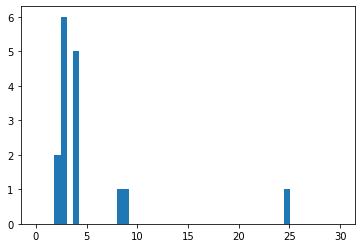

In [71]:
plt.hist(good_df.apply(lambda x: np.median(x[x>0]), axis=1), bins=np.linspace(0,30))

(array([960.,  16.,   5.,   3.,   5.,   2.,   0.,   1.,   2.,   6.]),
 array([4.37828371e-04, 9.95621716e-02, 1.98686515e-01, 2.97810858e-01,
        3.96935201e-01, 4.96059545e-01, 5.95183888e-01, 6.94308231e-01,
        7.93432574e-01, 8.92556918e-01, 9.91681261e-01]),
 <BarContainer object of 10 artists>)

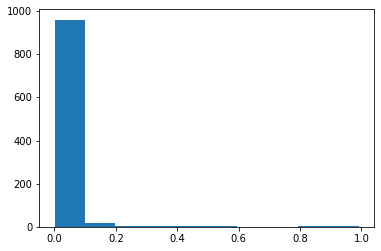

In [59]:
plt.hist(df.apply(lambda x: np.mean(x>0), axis=1))

(array([  0.,   0.,   0.,   0., 605.,   0.,  57., 149.,  33.,  70.,   0.,
          6.,  38.,  10.,  10.,   4.,   0.,   6.,   1.,   4.,   0.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
         6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
         8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
        10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
        12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
        14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
        16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       

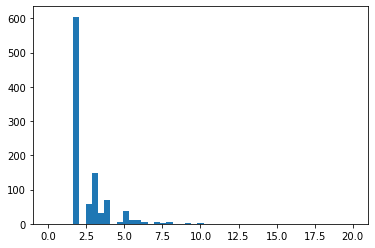

In [58]:
plt.hist(df.apply(lambda x: np.median(x[x!=0]), axis=1), bins=np.linspace(0,20))

In [12]:
BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']

In [41]:
bam_mappings = bam_mappings.drop('09C86428')

,status,participant_id,family,AGRE Blood,NIMH Blood,relationship,FatherID,MotherID,sex_numeric,derived_affected_status,...,number_of_indels,number_of_homozygous_snvs,number_of_heterozygous_snvs,het_to_hom_ratio,ti_tv_ratio,dbsnp_overlap,concordance_with_genotyping_chip,cryptic_relatedness_check,family_based_average_coverage,familial_relationship_check
sample_id,,,,,,,,,,,,,,,,,,,,,
02C10540,Passed_QC_analysis_ready,AU1005201,AU1005,HI2393,02C10540,father,0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10541,Passed_QC_analysis_ready,AU1005202,AU1005,HI2394,02C10541,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10542,Passed_QC_analysis_ready,AU1005302,AU1005,HI2395,02C10542,sibling,AU1005201,AU1005202,2.0,broad-spectrum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10543,Passed_QC_analysis_ready,AU1005301,AU1005,HI2396,02C10543,sibling,AU1005201,AU1005202,1.0,autism,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02C10702,Passed_QC_analysis_ready,AU1004202,AU1004,HI2397,02C10702,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH0143008,Passed_QC_analysis_ready,AU3859201,AU3859,HI11780,MH0143008,father,0,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MH0143009,Passed_QC_analysis_ready,AU3859202,AU3859,HI11781,MH0143009,mother,0,0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MH0143013,Passed_QC_analysis_ready,AU3859303,AU3859,HI11784,MH0143013,sibling,AU3859201,AU3859202,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
